# Mesure température

## 1. Lecture des mesures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pyduino import lit_fichier

# Lit le fichier de mesures et le stocke dans des tableaux
t, T = np.array(lit_fichier('temperatures_400s.csv'))

print(T[:5])

[49.71 48.09 46.42 45.05 43.82]


## 2. Représentation graphique des données

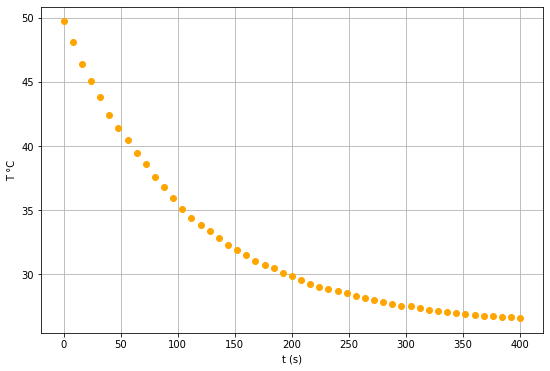

In [2]:
n = 0
t, T = t[n:], T[n:]
fig_c = plt.figure("Evolution de la température", figsize=(9, 6))
plt.plot(t, T, linestyle='', marker ='o', color ='orange')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel ('T °C')
plt.show()

## 3. Mesure de $\tau$

### Ajustement à une exponentielle

In [3]:
def fonct_ajust(t, A, B, τ):
    return A + B * np.exp(-t/τ)
    # return a * 1/t + b

init_vals = [20, 40, 120]
popt, pcov = curve_fit(fonct_ajust, t, T, p0=init_vals)
print(popt)
print(f'La valeur de τ est {popt[0]:.3f} s' )

[ 25.94331352  23.81819469 110.24276424]
La valeur de τ est 25.943 s


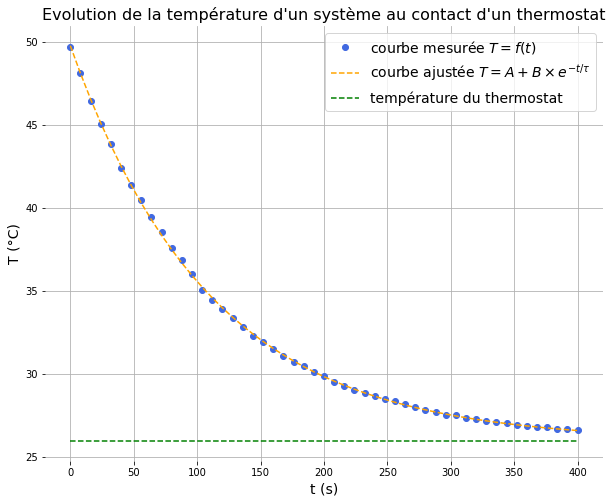

In [4]:
#  Graphe et modélisation
fig = plt.figure('Evolution de la température', figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Evolution de la température d'un système au contact d'un thermostat", fontsize=16)
ax.plot(t, T, linestyle='', marker ='o', color ='royalblue', label='courbe mesurée $T=f(t)$')
ax.plot(t, fonct_ajust(t, *popt), linestyle='--', color='orange',
        label = 'courbe ajustée $T = A + B \\times e^{-t / \\tau}$')
ax.plot(t, [popt[0] for e in t],linestyle='--',color = 'green',label = 'température du thermostat')
ax.set_xlabel('t (s)', fontsize=14)
ax.set_ylabel ('T (°C)', fontsize=14)
#ax.set_xlim([0, max(t)*1.05])
#ax.set_ylim([-0.5, max(T)*1.05])
ax.legend(fontsize=14)
ax.set_frame_on(False) 
ax.grid()
plt.show()